In [ ]:
!pip install tensorflow==2.0

In [4]:
import tensorflow as tf

print(tf.__version__)

2.2.0


# Loading the data

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


base = '../input/face-expression-recognition-dataset/images/'

train_dir = os.path.join(base, 'train')
valid_dir = os.path.join(base, 'validation')

train_datagen = ImageDataGenerator(
    rescale=1./255
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

valid_dataset = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

input_shape = (48,48,1)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Function for training, 
we often training with different model, so it is better to define a function which can define how the training works and the feedback that we expect in a single function

In [34]:
def train(model, train_dataset, valid_dataset):
    history = model.fit_generator(
              train_dataset,
              epochs=15,
              validation_data=valid_dataset
    )
    import matplotlib.pyplot as plt

    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(history.history['acc'], label='Training Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.show()

# Model Definition

In [50]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer='RMSProp',
    loss='categorical_crossentropy',
    metrics = ['acc']
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)             

Epoch 1/15
451/451 [==============================] - 39s 87ms/step - loss: 1.6453 - acc: 0.3501 - val_loss: 1.4822 - val_acc: 0.4420
Epoch 2/15
451/451 [==============================] - 39s 86ms/step - loss: 1.4170 - acc: 0.4588 - val_loss: 1.3684 - val_acc: 0.4751
Epoch 3/15
451/451 [==============================] - 38s 85ms/step - loss: 1.3033 - acc: 0.5025 - val_loss: 1.2869 - val_acc: 0.5074
Epoch 4/15
451/451 [==============================] - 39s 87ms/step - loss: 1.2104 - acc: 0.5393 - val_loss: 1.2552 - val_acc: 0.5253
Epoch 5/15
451/451 [==============================] - 39s 87ms/step - loss: 1.1319 - acc: 0.5716 - val_loss: 1.2120 - val_acc: 0.5504
Epoch 6/15
451/451 [==============================] - 40s 88ms/step - loss: 1.0517 - acc: 0.6079 - val_loss: 1.2178 - val_acc: 0.5393
Epoch 7/15
451/451 [==============================] - 41s 91ms/step - loss: 0.9710 - acc: 0.6373 - val_loss: 1.2757 - val_acc: 0.5412
Epoch 8/15
451/451 [==============================] - 40s 89ms

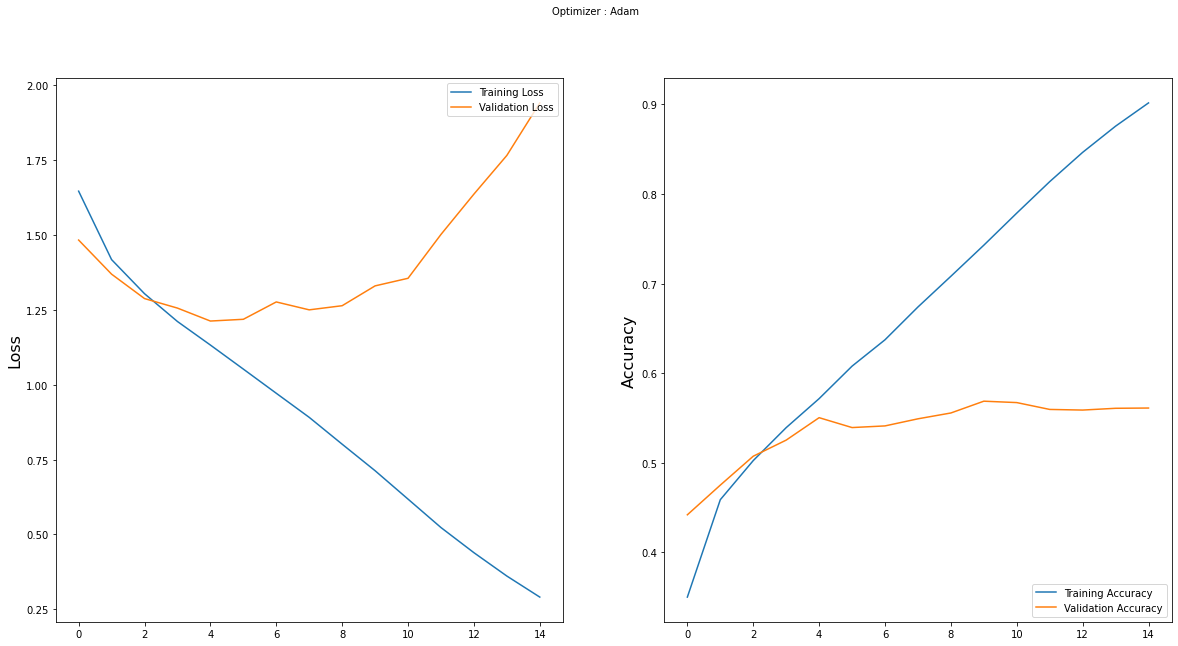

In [51]:
train(model, train_dataset, valid_dataset)

In [36]:
model.save('basic_cnn.h5')

## Basic CNN with drop out

In [42]:
cnn_do = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(7, activation='softmax')
])

cnn_do.compile(
    optimizer='RMSProp',
    loss='categorical_crossentropy',
    metrics = ['acc']
)

cnn_do.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)         

Epoch 1/15
451/451 [==============================] - 39s 86ms/step - loss: 1.6983 - acc: 0.3208 - val_loss: 1.5173 - val_acc: 0.4069
Epoch 2/15
451/451 [==============================] - 40s 88ms/step - loss: 1.4784 - acc: 0.4275 - val_loss: 1.3845 - val_acc: 0.4737
Epoch 3/15
451/451 [==============================] - 39s 87ms/step - loss: 1.3751 - acc: 0.4751 - val_loss: 1.3163 - val_acc: 0.4953
Epoch 4/15
451/451 [==============================] - 39s 86ms/step - loss: 1.3147 - acc: 0.4986 - val_loss: 1.2849 - val_acc: 0.5110
Epoch 5/15
451/451 [==============================] - 39s 87ms/step - loss: 1.2654 - acc: 0.5181 - val_loss: 1.2372 - val_acc: 0.5359
Epoch 6/15
451/451 [==============================] - 39s 85ms/step - loss: 1.2202 - acc: 0.5373 - val_loss: 1.2026 - val_acc: 0.5498
Epoch 7/15
451/451 [==============================] - 39s 86ms/step - loss: 1.1852 - acc: 0.5518 - val_loss: 1.1773 - val_acc: 0.5593
Epoch 8/15
451/451 [==============================] - 39s 86ms

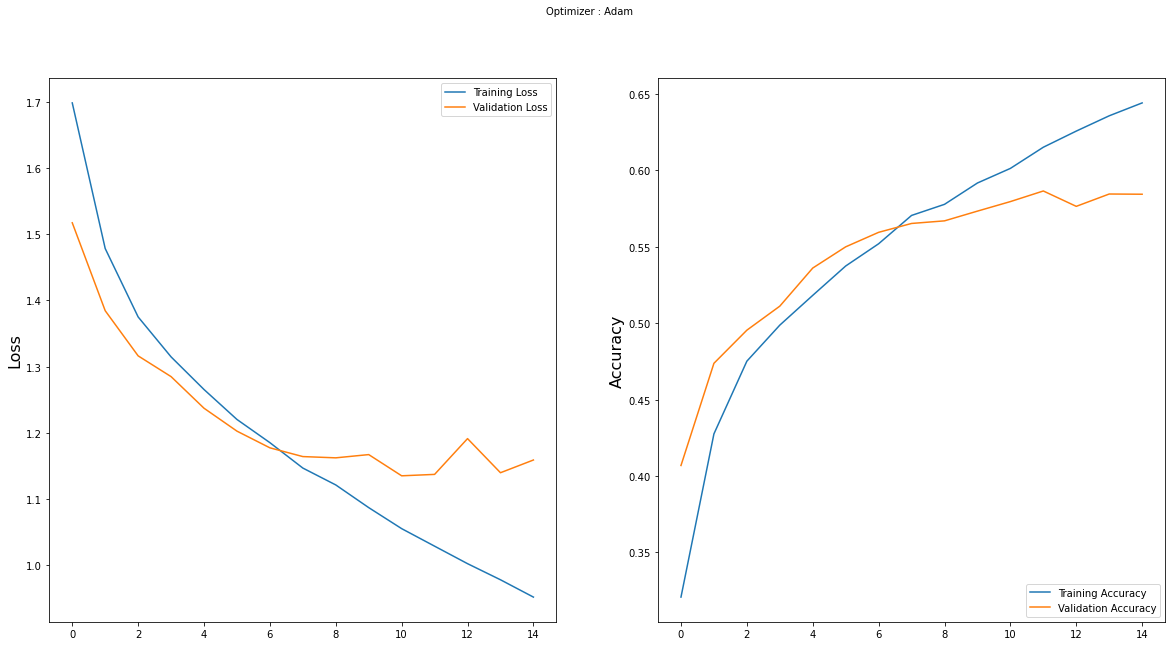

In [44]:
train(cnn_do, train_dataset, valid_dataset)
cnn_do.save('cnn_do.h5')

## Try with pretrained model